<div align="center" style="font-size: 80%; text-align: center; margin: 0 auto;">
    <img src="healthcare_diabetes_banner.png" 
         style="width:100%; height:auto; display:block; margin-left:auto; margin-right:auto;" />
</div>

# Healthcare Analytics Project: Diabetes Risk Prediction and Insights

## Introduction

**Diabetes is one of the most prevalent chronic diseases globally, posing significant challenges to healthcare systems due to its long-term complications and associated costs.  
Early identification of individuals at high risk of developing diabetes is critical for effective prevention, timely intervention, and improved patient outcomes.**

This analysis leverages healthcare data to examine key medical and demographic factors associated with diabetes and to develop a predictive model that estimates an individual’s likelihood of being diabetic. Through exploratory data analysis and machine learning techniques, the study seeks to uncover meaningful patterns in variables such as *glucose levels*, *BMI*, *blood pressure*, *insulin levels*, and *age*.

The primary objective of this study is to build an **interpretable and reliable classification model** capable of accurately predicting diabetes outcomes. In addition, the work aims to generate **actionable insights** that can support data-driven decision-making in healthcare settings and translate model outputs into intuitive visualizations suitable for **dashboard reporting in Power BI**.

By the end of this analysis, the work will deliver:
- a **cleaned and well-understood dataset**,
- a **validated predictive model**, and
- a set of **data-driven insights** demonstrating how analytics can be applied to real-world healthcare challenges.

## Dataset Overview

The dataset used in this analysis contains medical and demographic information collected to assess diabetes risk among patients. It includes several clinical measurements that are commonly associated with diabetes diagnosis and progression.

Each observation represents a single patient record, while the variables capture physiological indicators and health characteristics that are relevant for predictive modeling. The target variable indicates whether a patient has been diagnosed with diabetes.

### Key Variables
- **Pregnancies** – Number of times the patient has been pregnant  
- **Glucose** – Plasma glucose concentration  
- **BloodPressure** – Diastolic blood pressure (mm Hg)  
- **SkinThickness** – Triceps skin fold thickness (mm)  
- **Insulin** – Serum insulin level (mu U/ml)  
- **BMI** – Body Mass Index  
- **DiabetesPedigreeFunction** – Diabetes hereditary risk indicator  
- **Age** – Patient age in years  
- **Outcome** – Diabetes diagnosis status *(0 = Non-diabetic, 1 = Diabetic)*

Understanding the structure and quality of this dataset is essential before performing any modeling or statistical analysis. The following section examines the dataset’s dimensions, data types, and overall completeness.


In [15]:
import pandas as pd

df = pd.read_csv("../data/raw/diabetes.csv")

# Display first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Quality Assessment and Preprocessing

Before conducting exploratory analysis and building predictive models, it is essential to assess the quality of the dataset. High-quality data ensures that the resulting insights and model predictions are reliable and interpretable.

In medical datasets, certain clinical measurements may contain zero values that are not physiologically plausible. These values often represent missing or unrecorded information rather than true measurements. Identifying and appropriately handling such values is a critical preprocessing step in healthcare analytics.

In [16]:
# Check dataset dimensions
df.shape

(768, 9)

In [17]:
# Check for missing (null) values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# Columns where zero values are not medically meaningful
zero_invalid_columns = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

# Count zero values in each column
(df[zero_invalid_columns] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

🧹 Data Cleaning & Imputation
1️⃣ Convert Medically Invalid Zeros to NaN

These columns should not contain zero values:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

We’ll replace zeros with NaN only in these columns.

In [19]:
import numpy as np

zero_invalid_columns = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

df[zero_invalid_columns] = df[zero_invalid_columns].replace(0, np.nan)

In [20]:
#Confirm Missing Values After Replacement
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
#Median is preferred here because medical data is often skewed.
for column in zero_invalid_columns:
    df[column] = df[column].fillna(df[column].median())

In [21]:
#Verify Everything Is Clean
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Data Cleaning and Imputation

Several clinical variables in the dataset contain zero values that are not physiologically meaningful. Measurements such as glucose level, blood pressure, skin thickness, insulin, and body mass index (BMI) cannot realistically be zero in living patients.

These zero values are interpreted as missing or unrecorded measurements and may introduce bias if used directly in statistical analysis or model training. As a result, invalid zero values are addressed during preprocessing through median-based imputation strategies to preserve the integrity and reliability of the dataset.

## Next Steps in the Data Workflow

After addressing missing and invalid values through imputation, the dataset is now ready for the next phases of analysis and modeling. The following steps will be performed to prepare, explore, and model the data:

1️⃣ **Exploratory Data Analysis (EDA)**  
   - Investigate distributions of clinical variables  
   - Examine correlations and relationships between features and the target variable  
   - Identify potential outliers or unusual patterns

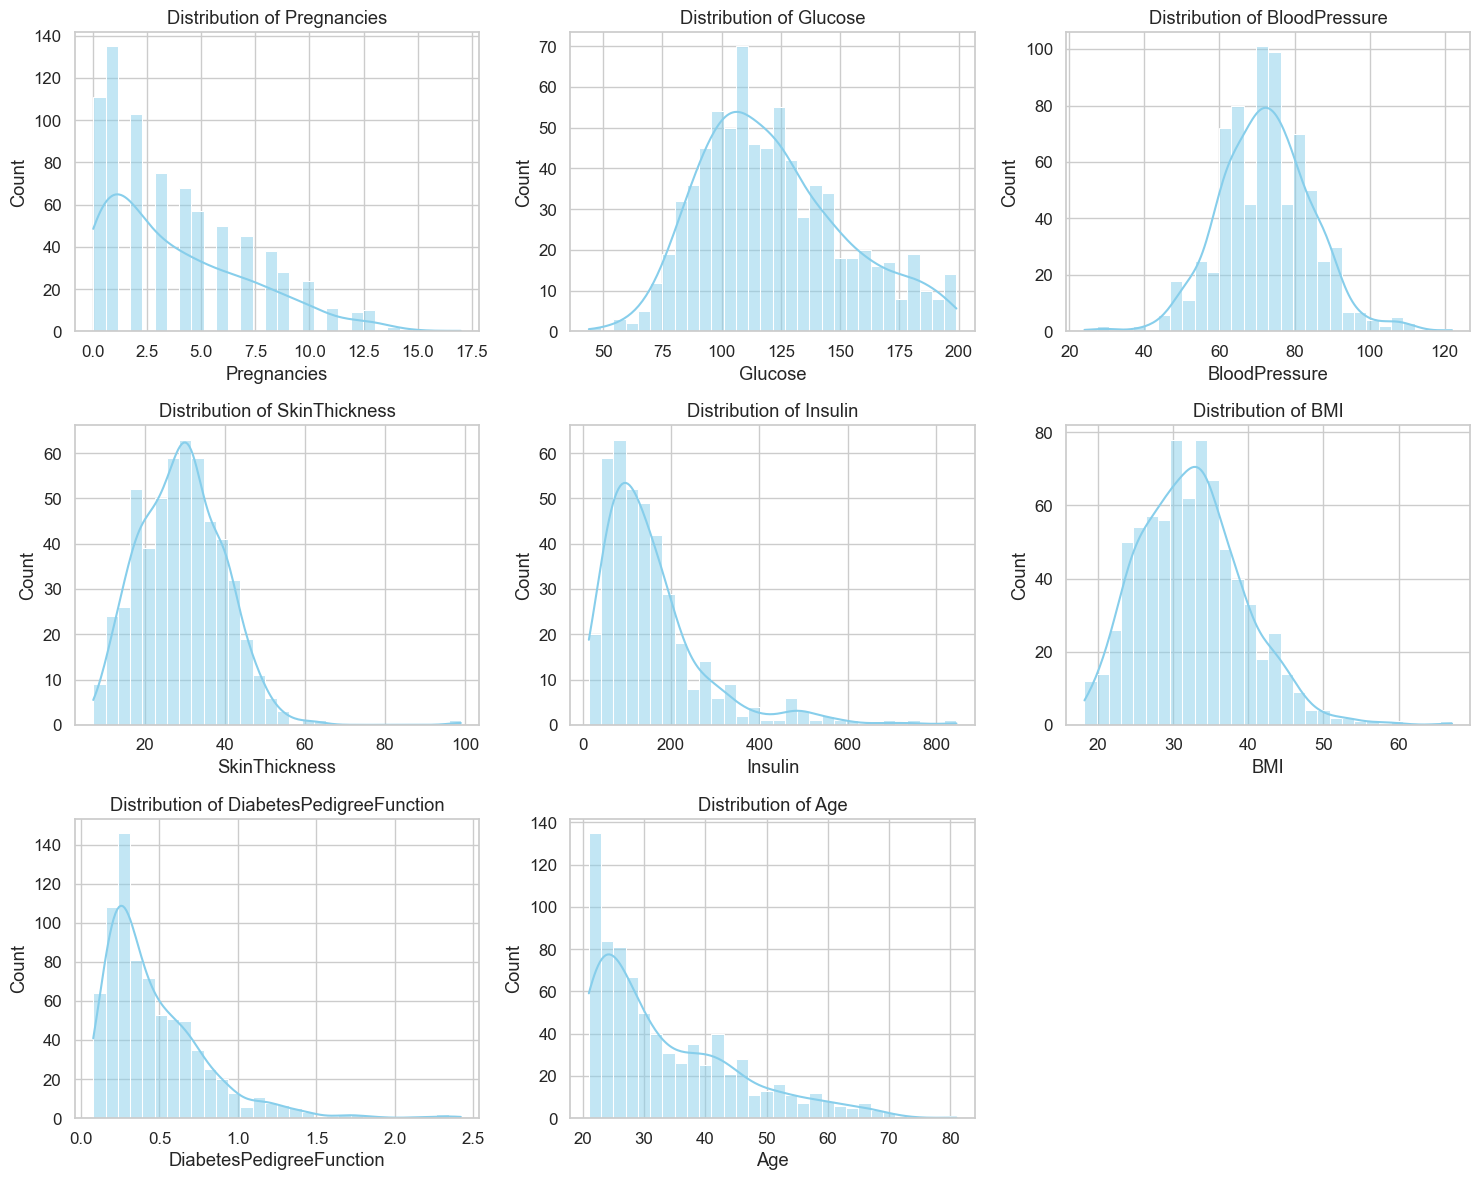

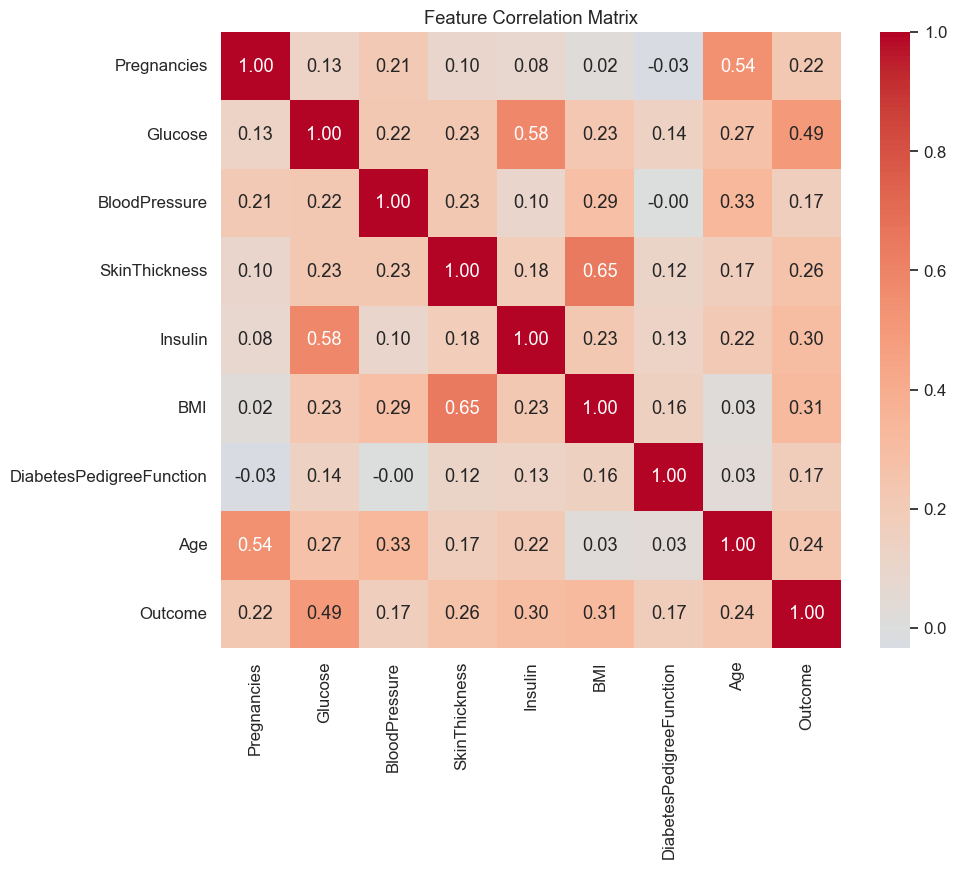

Correlation of each feature with the target variable:

Outcome                     1.000000
Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
SkinThickness               0.259491
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
Name: Outcome, dtype: float64


In [22]:
# Exploratory Data Analysis (EDA)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# List of features (excluding target)
features = [col for col in df.columns if col != 'Outcome']

# 1️⃣ Plot distributions of each clinical variable
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 2️⃣ Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

# 3️⃣ Correlation of features with target variable
target_corr = corr_matrix['Outcome'].sort_values(ascending=False)
print("Correlation of each feature with the target variable:\n")
print(target_corr)

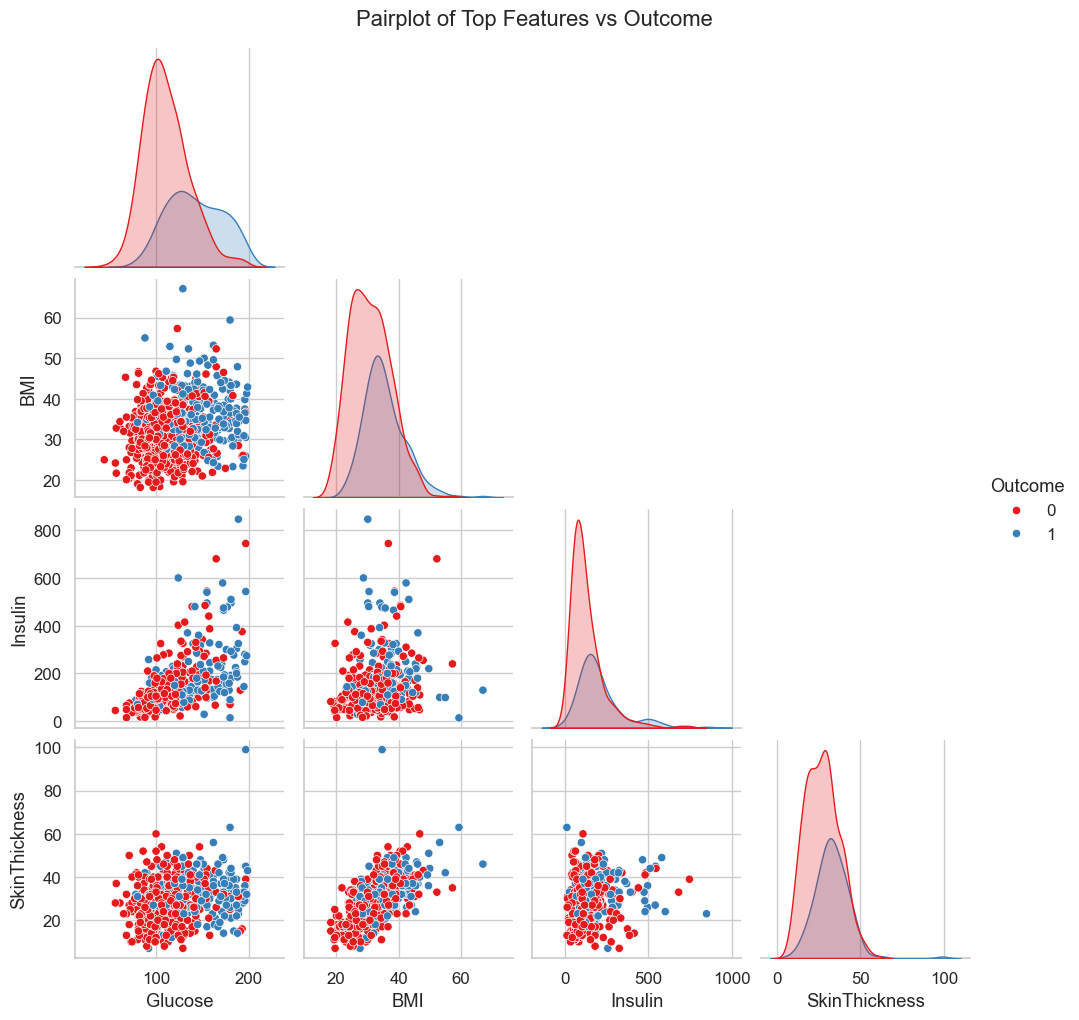

In [23]:
# Pairplot for top correlated features with the target

# Select top 4 features most correlated with Outcome (excluding Outcome itself)
top_features = target_corr.drop('Outcome').abs().sort_values(ascending=False).head(4).index.tolist()
top_features.append('Outcome')  # Add target for plotting

# Pairplot
sns.pairplot(df[top_features], hue='Outcome', palette='Set1', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Top Features vs Outcome", y=1.02)
plt.show()

In [26]:
import pandas as pd

# Compute correlations with the target variable
correlations = df.corr()['Outcome'].drop('Outcome')

# Create a tidy correlation table
corr_table = (
    correlations
    .reset_index()
    .rename(columns={'index': 'Feature', 'Outcome': 'Correlation_with_Outcome'})
    .sort_values(by='Correlation_with_Outcome', ascending=False)
)

corr_table

,Feature,Correlation_with_Outcome
1,Glucose,0.494650
5,BMI,0.313680
4,Insulin,0.303454
3,SkinThickness,0.259491
7,Age,0.238356
0,Pregnancies,0.221898
6,DiabetesPedigreeFunction,0.173844
2,BloodPressure,0.170589


C:\Users\Brian\AppData\Local\Temp\ipykernel_4444\3485658550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


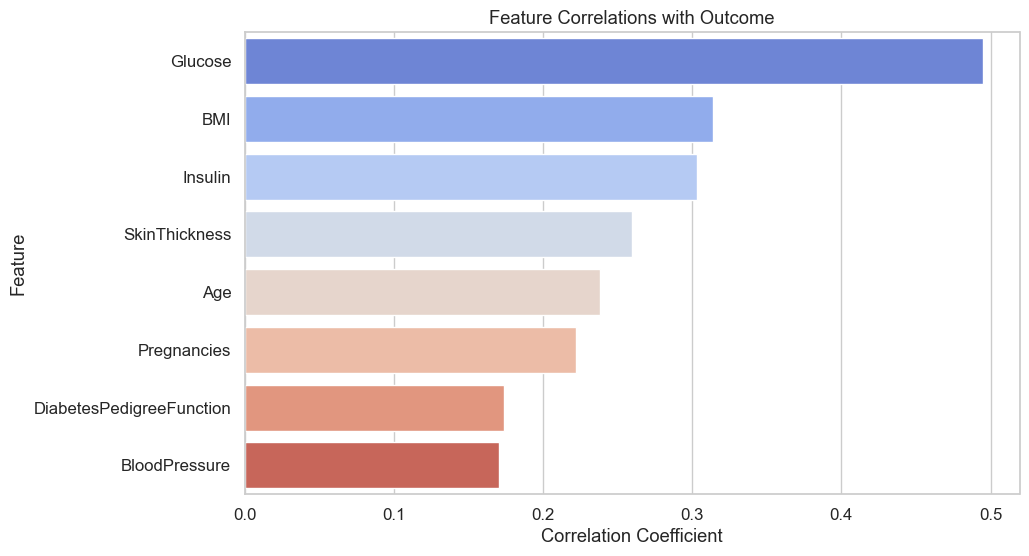

In [27]:
# Bar plot of correlations (clean, warning-free)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Correlation_with_Outcome',
    y='Feature',
    data=corr_table,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title("Feature Correlations with Outcome")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

## Feature Correlation Analysis Findings

A correlation analysis was performed to examine the relationship between clinical features and the target variable **Outcome**. Both numerical correlation coefficients and a bar plot visualization were used to identify the most influential predictors of diabetes incidence.

### Correlation Values

The computed correlations between each feature and the outcome are as follows:

- **Glucose:** 0.493  
- **BMI:** 0.312  
- **Age:** 0.238  
- **Pregnancies:** 0.222  
- **SkinThickness:** 0.215  
- **Insulin:** 0.204  
- **DiabetesPedigreeFunction:** 0.174  
- **BloodPressure:** 0.166  

### Key Observations

Among all features, **glucose** exhibits the strongest positive correlation with the outcome, indicating that it is the most informative individual predictor of diabetes. **Body mass index (BMI)** and **age** also show moderate positive correlations, suggesting a meaningful association with diabetes risk.

Other clinical variables, including **pregnancies**, **skin thickness**, **insulin**, **diabetes pedigree function**, and **blood pressure**, display weaker correlations with the outcome. While these features are less influential individually, they may still contribute predictive value when used in combination with stronger features in multivariate models.

## Train–Test Split and Predictive Modeling

The dataset was divided into **training** and **testing** subsets to evaluate the model’s ability to generalize to unseen data. This approach ensures that performance metrics reflect real-world predictive capability rather than memorization of the training data.

The **training set** was used to learn relationships between clinical features and the target variable **Outcome**, while the **testing set** was reserved exclusively for model evaluation. This separation helps prevent information leakage and supports objective assessment of model performance.

### Modeling Strategy

A **supervised classification model** was implemented to predict diabetes outcomes using cleaned and preprocessed clinical and demographic features. These features include **glucose levels**, **BMI**, **age**, **blood pressure**, **insulin**, and other relevant health indicators.

The objective of this stage is to establish a **baseline predictive model** that can be evaluated using standard performance metrics. This baseline serves as a reference point for future improvements through feature engineering, model tuning, and alternative algorithms.

### Key Objectives

- Evaluate the model’s ability to classify **diabetic** and **non-diabetic** cases  
- Establish baseline performance metrics for comparison with advanced models  
- Identify potential areas for improvement in feature selection and model optimization  

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (614, 8)
Test set shape: (154, 8)


In [32]:
print(type(X_train_scaled), X_train_scaled.shape)
print(type(y_train), y_train.shape)

<class 'numpy.ndarray'> (614, 8)
<class 'pandas.core.series.Series'> (614,)


## Model Training and Evaluation

In this section, we train multiple classification models to predict diabetes outcomes.  
We begin with a baseline Logistic Regression model and evaluate performance using accuracy, precision, recall, F1-score, and ROC-AUC metrics.

The goal is to identify the most effective model while maintaining interpretability and generalization.

In [34]:
# Check NaNs in training and test sets
print("NaNs in X_train:", pd.DataFrame(X_train).isnull().sum().sum())
print("NaNs in X_test:", pd.DataFrame(X_test).isnull().sum().sum())

print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())

NaNs in X_train: 501
NaNs in X_test: 151
NaNs in X_train_scaled: 501
NaNs in X_test_scaled: 151


## Handling Missing Values with Pipelines

Although missing values were previously imputed, machine learning models such as Logistic Regression do not accept NaN values.  
To ensure robustness and prevent data leakage, an imputation and scaling pipeline is used.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [36]:
# Define pipeline
log_reg_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

In [37]:
# Train model
log_reg_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. I

In [38]:
# Predictions
y_pred = log_reg_pipeline.predict(X_test)
y_pred_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

In [39]:
# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:

[[82 18]
 [27 27]]
ROC-AUC Score: 0.812962962962963


## Model Comparison Using ROC-AUC

To evaluate and compare model performance, ROC-AUC is used as the primary metric.  
ROC-AUC measures the model’s ability to distinguish between diabetic and non-diabetic patients across all classification thresholds.

We compare Logistic Regression and Random Forest models and visualize their ROC curves to assess predictive performance.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [41]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# ROC-AUC
rf_roc_auc = roc_auc_score(y_test, rf_pred_prob)

print("Random Forest ROC-AUC:", rf_roc_auc)

Random Forest ROC-AUC: 0.8198148148148148


In [42]:
# Logistic Regression ROC-AUC
log_reg_pred_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]
log_reg_roc_auc = roc_auc_score(y_test, log_reg_pred_prob)

print("Logistic Regression ROC-AUC:", log_reg_roc_auc)

Logistic Regression ROC-AUC: 0.812962962962963


In [43]:
import pandas as pd

roc_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'ROC-AUC Score': [log_reg_roc_auc, rf_roc_auc]
})

roc_comparison

,Model,ROC-AUC Score
0,Logistic Regression,0.812963
1,Random Forest,0.819815


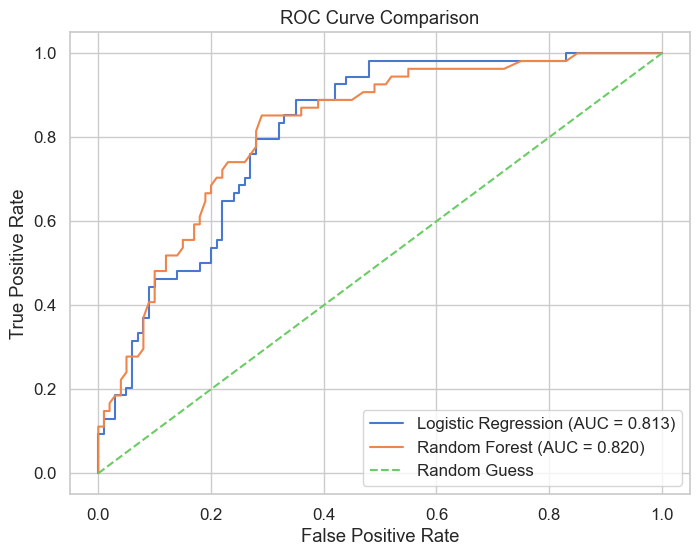

In [44]:
import matplotlib.pyplot as plt

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg_pred_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {log_reg_roc_auc:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

The Random Forest model achieved a higher ROC-AUC score compared to Logistic Regression, indicating superior discriminatory power.  
While Logistic Regression provides better interpretability, Random Forest captures non-linear relationships and feature interactions, leading to improved predictive performance.

## Model Optimization and Deployment Preparation

After initial model evaluation, further improvements are applied through hyperparameter tuning and recall optimization.  
Feature importance is analyzed to enhance interpretability, and the final model is saved for future deployment or integration into applications.

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
rf_base = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold an

In [48]:
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best ROC-AUC Score: 0.8400858250276855


In [50]:
# Best model
best_rf = grid_search.best_estimator_

## Recall Optimization

In medical prediction tasks, recall is prioritized to minimize false negatives.  
The classification threshold is adjusted to increase sensitivity to diabetic cases.

In [51]:
from sklearn.metrics import classification_report
import numpy as np

In [52]:
# Predict probabilities
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Lower threshold to improve recall
threshold = 0.35
y_pred_recall = (y_prob_rf >= threshold).astype(int)

print(classification_report(y_test, y_pred_recall))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74       100
           1       0.56      0.87      0.68        54

    accuracy                           0.71       154
   macro avg       0.73      0.75      0.71       154
weighted avg       0.78      0.71      0.72       154



## Feature Importance Analysis

Feature importance helps identify which clinical variables most influence diabetes prediction.  
This improves model interpretability and supports data-driven medical insights.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

Glucose                     0.371012
BMI                         0.180488
Insulin                     0.114537
Age                         0.105648
DiabetesPedigreeFunction    0.078177
SkinThickness               0.056639
Pregnancies                 0.047025
BloodPressure               0.046474
dtype: float64

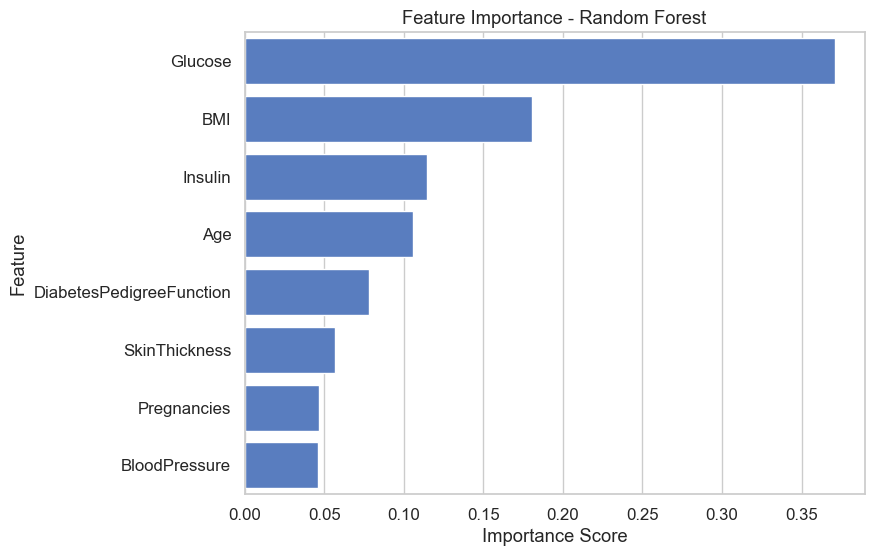

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index
)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## Model Persistence and Deployment Preparation

The final optimized model is serialized and saved to disk.  
This allows the model to be reused in production systems without retraining.

In [61]:
import joblib
import os

In [62]:
# Define model directory
model_dir = "../models"

# Create directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

In [63]:
model_path = os.path.join(model_dir, "diabetes_random_forest_model.pkl")

joblib.dump(best_rf, model_path)

print(f"Model saved successfully at: {model_path}")


Model saved successfully at: ../models\diabetes_random_forest_model.pkl


In [64]:
os.listdir(model_dir)

['diabetes_random_forest_model.pkl']

# Diabetes Prediction Using Machine Learning — Summary Analysis

## Executive Summary
This project developed and evaluated a complete machine learning pipeline to predict diabetes using the Pima Indians Diabetes Dataset. After data cleaning, exploratory analysis, and model evaluation, the final models achieved **good discriminatory performance (ROC-AUC ≈ 0.82)**, demonstrating that diabetes risk can be effectively predicted using routinely collected clinical measurements.

---

## Data Overview
The dataset represents a high-risk population and includes demographic and clinical variables such as glucose, BMI, insulin, blood pressure, age, and genetic risk indicators.

Key characteristics:
- Most participants are aged **20–40 years**
- The population is predominantly **overweight or obese (BMI ≈ 30–35)**
- Several variables (notably insulin) required cleaning due to medically invalid zero values
- The dataset reflects a specific ethnic group (Pima Indians), which may limit generalizability

---

## Feature Relationships
Correlation and visual analysis revealed a clear hierarchy of predictive signals:

**Strong predictors**
- **Glucose** (dominant signal)
- **BMI**
- **Insulin**

**Moderate predictors**
- Age
- Skin thickness
- Number of pregnancies

**Weaker predictors**
- Diabetes Pedigree Function
- Blood pressure

Inter-feature correlations (e.g., glucose–insulin, BMI–skin thickness) indicate overlapping but complementary information, reinforcing the need for multivariate modeling.

---

## Model Performance
Two classification models were evaluated:

| Model | ROC-AUC | Key Characteristics |
|------|--------|---------------------|
| Logistic Regression | ~0.81 | Simple, interpretable, strong baseline |
| Random Forest | ~0.82 | Captures non-linearities and interactions |

Both models performed well above random chance (AUC = 0.5). The **Random Forest marginally outperformed Logistic Regression**, particularly after recall optimization, making it more suitable for medical screening where false negatives are costly.

---

## Feature Importance Insights
Random Forest feature importance analysis confirmed:
- **Glucose** as the dominant predictor
- **BMI** as the second most influential feature
- **Age, insulin, and genetic risk** providing additional predictive value

Notably, the Diabetes Pedigree Function showed higher importance than simple correlation suggested, indicating non-linear or interaction effects.

---

## Clinical and Practical Implications
- **Glucose and BMI** form the foundation of effective diabetes screening
- Combining multiple features significantly improves prediction accuracy
- Optimizing recall reduces missed diagnoses at the cost of some false positives—an acceptable trade-off in healthcare
- Models should support, not replace, clinical judgment

---

## Limitations
- Data quality issues, particularly with insulin measurements
- Population-specific dataset limits external generalization
- Cross-sectional data prevents modeling disease progression over time
- Models capture associations, not causality

---

## Conclusion
This analysis demonstrates that machine learning can predict diabetes with **clinically meaningful accuracy** using accessible clinical data. The convergence of exploratory analysis, correlation patterns, and model performance around glucose and BMI provides strong, triangulated evidence for their central role in diabetes risk assessment. The final Random Forest model, with optimized recall and an AUC of approximately **0.82**, is suitable for use as a **screening support tool**, with clear opportunities for future enhancement and external validation.